In [12]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
                                    StratifiedKFold,
                                    cross_validate
                                )
from sklearn.metrics import (
                            classification_report,
                            confusion_matrix,
                            roc_auc_score,
                            roc_curve,
                            accuracy_score,
                            precision_recall_curve,
                            f1_score,
                            precision_score,
                            recall_score
                        )
warnings.filterwarnings('ignore')

#### Loading Data

In [13]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/Y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/Y_test.npz')['arr_0']

#### Configure k-fold CV

In [14]:
cv = StratifiedKFold(
                    n_splits=6,
                    shuffle=True,
                    random_state=42
                )

In [15]:
model_lr = LogisticRegression(
                            random_state=42,
                            max_iter=1000
                        )

In [16]:
cv_results = cross_validate(
                            model_lr,
                            X_train,
                            Y_train,
                            cv=cv, scoring='accuracy',
                            return_train_score=True
                        )

In [17]:
cv_results

{'fit_time': array([0.12594342, 0.17862988, 0.12420177, 0.15513515, 0.20039034,
        0.19481039]),
 'score_time': array([0.00207663, 0.        , 0.00102639, 0.        , 0.        ,
        0.00201583]),
 'test_score': array([0.80217391, 0.8       , 0.78607687, 0.80058013, 0.78970268,
        0.79622915]),
 'train_score': array([0.79814385, 0.79814385, 0.80165289, 0.80165289, 0.80266783,
        0.80063796])}

In [18]:
score_arr = ['accuracy', 'precision', 'recall', 'f1']

for score in score_arr:
    cv_results = cross_validate(
                                model_lr,
                                X_train,
                                Y_train,
                                cv=cv, scoring=score,
                                return_train_score=True
                            )
    test_score = cv_results['test_score']
    print(test_score)

    test_score_avg = np.mean(test_score)
    print(f'Average {score} : {test_score_avg}')
    print('---------------------------------------------')

[0.80217391 0.8        0.78607687 0.80058013 0.78970268 0.79622915]
Average accuracy : 0.795793790921798
---------------------------------------------
[0.78838174 0.7875     0.76912568 0.78434066 0.7739726  0.79172611]
Average precision : 0.7825077989070941
---------------------------------------------
[0.82608696 0.82173913 0.81712627 0.8287373  0.81884058 0.80434783]
Average recall : 0.8194796771909157
---------------------------------------------
[0.80679406 0.80425532 0.79239972 0.80592802 0.79577465 0.79798706]
Average f1 : 0.8005231362254244
---------------------------------------------


#### Obtain the best model

In [19]:
best_index = np.argmax(cv_results['test_score'])
fold_indices = list(cv.split(X_train, Y_train))

best_train_idx, best_test_idx = fold_indices[best_index]

X_train_best = X_train[best_train_idx]
Y_train_best = Y_train[best_train_idx]
X_test_best = X_train[best_test_idx]
Y_test_best = Y_train[best_test_idx]

In [20]:
model_lr = LogisticRegression(
                            random_state=42,
                            max_iter=1000
                        )

model_lr.fit(X_train_best, Y_train_best)

LogisticRegression(max_iter=1000, random_state=42)

In [21]:
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)

In [22]:
accuracy = accuracy_score(Y_test, Y_hat_test)
precision = precision_score(Y_test, Y_hat_test)
recall = recall_score(Y_test, Y_hat_test)
f1 = f1_score(Y_test, Y_hat_test)

In [23]:
print(f'Accuracy : {accuracy}')
print(f'precision : {precision}')
print(f'recall : {recall}')
print(f'f1_score : {f1}')

Accuracy : 0.7672107877927609
precision : 0.5435203094777563
recall : 0.7533512064343163
f1_score : 0.6314606741573033


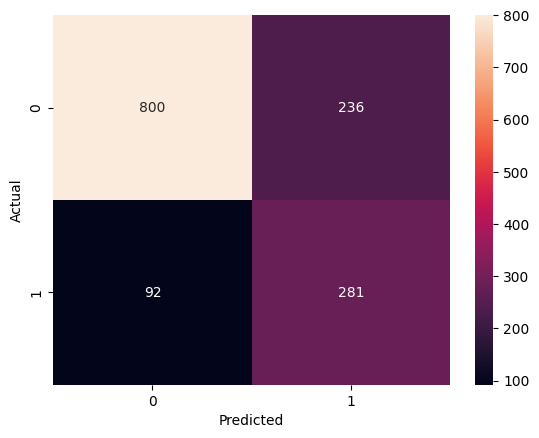

In [24]:
cm = confusion_matrix(Y_test, Y_hat_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()